In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [5]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flin flon
Processing Record 2 of Set 1 | kerteh
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | maniwaki
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | weyburn
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | s

Processing Record 36 of Set 4 | boda
Processing Record 37 of Set 4 | chapais
Processing Record 38 of Set 4 | najran
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | kabare
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | rapid valley
Processing Record 44 of Set 4 | derzhavinsk
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | olinda
Processing Record 49 of Set 4 | bubaque
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | nagapattinam
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | khvalynsk
Processing Record 4 of Set 5 | baykit
Processing Record 5 of Set 5 | lerwick
Processing Record 6 of Set 5 | praia
Processing Record 7 of Set 5 | viedma
Processing Record 8 of Set 5 | praia da vitoria
Processing Record 9 of Set 5 | sao felix do xingu
Processi

Processing Record 27 of Set 8 | chhuikhadan
Processing Record 28 of Set 8 | brae
Processing Record 29 of Set 8 | belyy yar
Processing Record 30 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 31 of Set 8 | shelburne
Processing Record 32 of Set 8 | road town
Processing Record 33 of Set 8 | vila do maio
Processing Record 34 of Set 8 | moron
Processing Record 35 of Set 8 | samarai
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | mitsamiouli
Processing Record 38 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 8 | singleton
Processing Record 40 of Set 8 | matagami
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | khorixas
Processing Record 43 of Set 8 | kargasok
Processing Record 44 of Set 8 | santiago de chuco
Processing Record 45 of Set 8 | labuhan
Processing Record 46 of Set 8 | harer
Processing Record 47 of Set 8 | portland
Processing Record 48 of Set 8 | martapura
Processing Record 49 of S

Processing Record 15 of Set 12 | oxford
Processing Record 16 of Set 12 | south venice
Processing Record 17 of Set 12 | port macquarie
Processing Record 18 of Set 12 | hammerfest
Processing Record 19 of Set 12 | robertsport
Processing Record 20 of Set 12 | artesia
Processing Record 21 of Set 12 | bargal
City not found. Skipping...
Processing Record 22 of Set 12 | ceres
Processing Record 23 of Set 12 | komatipoort
Processing Record 24 of Set 12 | roald
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | khangarh
Processing Record 27 of Set 12 | dingle
Processing Record 28 of Set 12 | mackay
Processing Record 29 of Set 12 | lakes entrance
Processing Record 30 of Set 12 | bucerias
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | anderson
Processing Record 33 of Set 12 | mehamn
Processing Record 34 of Set 12 | saint anthony
Processing Record 35 of Set 12 | pousat
City not found. Skipping...
Processing Record 36 of Set 12 | jaipur hat
City not found

In [7]:
len(city_data)

599

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flin Flon,54.7682,-101.8650,33.80,55,75,16.11,CA,2021-04-01 00:26:51
1,Mataura,-46.1927,168.8643,60.01,74,51,3.00,NZ,2021-04-01 00:26:51
2,Kruisfontein,-34.0033,24.7314,64.99,74,54,1.99,ZA,2021-04-01 00:26:51
3,Albany,42.6001,-73.9662,57.00,72,100,1.01,US,2021-04-01 00:26:51
4,Qaanaaq,77.4840,-69.3632,0.39,76,100,15.64,GL,2021-04-01 00:26:52


In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flin Flon,CA,2021-04-01 00:26:51,54.7682,-101.8650,33.80,55,75,16.11
1,Mataura,NZ,2021-04-01 00:26:51,-46.1927,168.8643,60.01,74,51,3.00
2,Kruisfontein,ZA,2021-04-01 00:26:51,-34.0033,24.7314,64.99,74,54,1.99
3,Albany,US,2021-04-01 00:26:51,42.6001,-73.9662,57.00,72,100,1.01
4,Qaanaaq,GL,2021-04-01 00:26:52,77.4840,-69.3632,0.39,76,100,15.64
...,...,...,...,...,...,...,...,...,...
594,Hohhot,CN,2021-04-01 00:29:31,40.8106,111.6522,44.60,87,40,2.24
595,Bereda,ES,2021-04-01 00:29:31,43.2686,-7.5406,53.01,79,100,1.01
596,Bela,IN,2021-04-01 00:29:31,25.9333,81.9833,70.75,10,0,8.43
597,Gusau,NG,2021-04-01 00:29:32,12.1628,6.6614,75.85,15,5,9.98


In [11]:
# Create the output file (CSV).
file_to_ouput = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_ouput, index_label="City ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

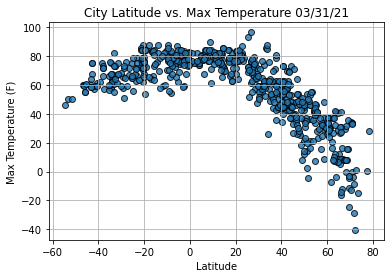

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor ='black',linewidth=1,marker='o',
           alpha=0.8, label='cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

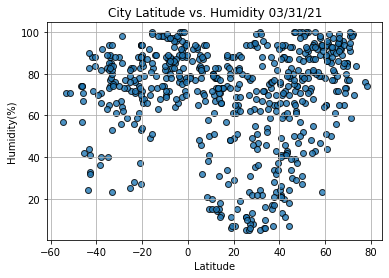

In [19]:
# Build the scatter plot for humidity vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor ='black',linewidth=1,marker='o',
           alpha=0.8, label='cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'))
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

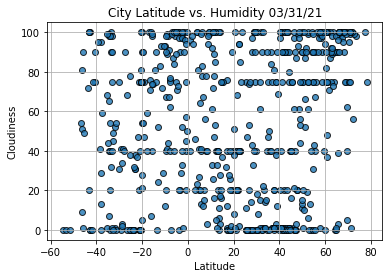

In [23]:
# Build the scatter plot for cloudiness vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor ='black',linewidth=1,marker='o',
           alpha=0.8, label='cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

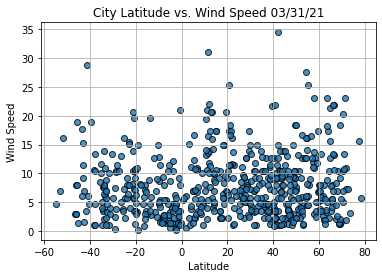

In [24]:
# Build the scatter plot for windspeed vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor ='black',linewidth=1,marker='o',
           alpha=0.8, label='cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                 San Patricio
Country                        US
Date          2021-04-01 00:26:34
Lat                        28.017
Lng                      -97.5169
Max Temp                     73.4
Humidity                       49
Cloudiness                     90
Wind Speed                  12.66
Name: 13, dtype: object

In [30]:
#slice the df by rows using values
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
594     True
595     True
596     True
597     True
598     True
Name: Lat, Length: 599, dtype: bool

In [34]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flin Flon,CA,2021-04-01 00:26:51,54.7682,-101.8650,33.80,55,75,16.11
3,Albany,US,2021-04-01 00:26:51,42.6001,-73.9662,57.00,72,100,1.01
4,Qaanaaq,GL,2021-04-01 00:26:52,77.4840,-69.3632,0.39,76,100,15.64
5,Hilo,US,2021-04-01 00:23:22,19.7297,-155.0900,78.80,61,40,9.22
6,Ribeira Grande,PT,2021-04-01 00:26:52,38.5167,-28.7000,57.34,62,3,7.27


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

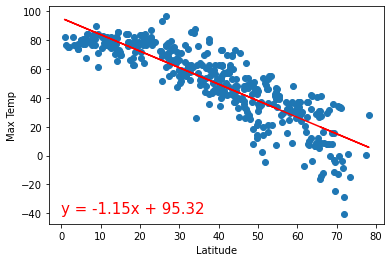

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-40))

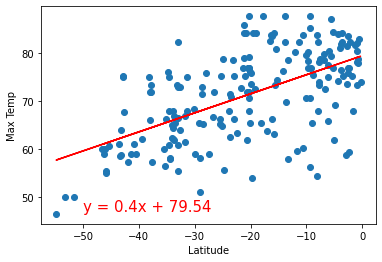

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,47))

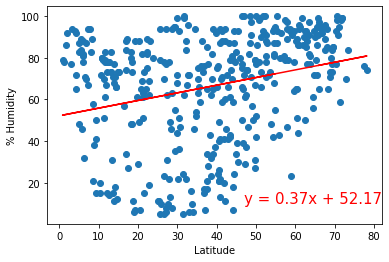

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(47,10))

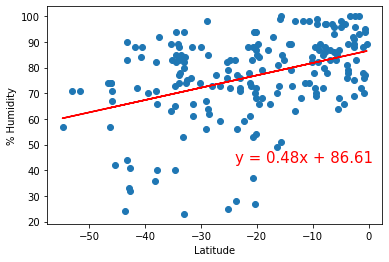

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-24,43))

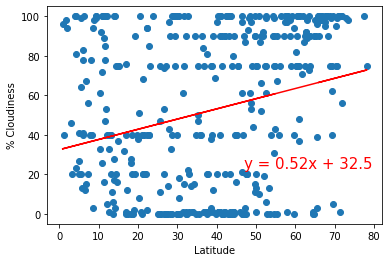

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Cloudiness',(47,23))

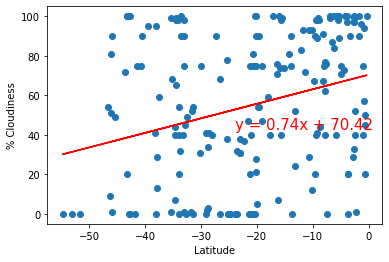

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Cloudiness',(-24,43))

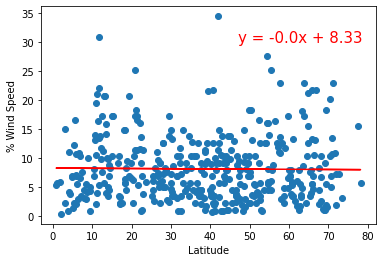

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Wind Speed',(47,30))

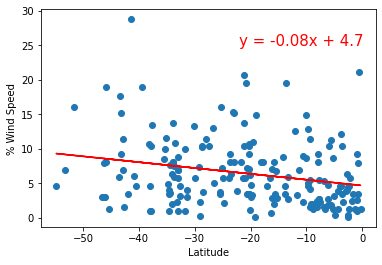

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Wind Speed',(-22,25))